<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [1]:
# insert code here

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# import keras
from keras.models import Sequential
from keras.layers import Dense
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [2]:
# insert code here
diabetes = load_diabetes()

### Prepare input data

In [3]:
# insert code here
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
y = diabetes.target
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [5]:
X = diabetes.data
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [6]:
# Standardise the features

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X)
#X = scaler.transform(X)
#X = pd.DataFrame(X)

In [17]:
# input
X = diabetes.data

# print the type of X to check that it is a numpy array
print("X is a ", type(X))

# Print shape to check rows and columns
print("X has {} rows and {} columns".format(X.shape[0], X.shape[1]))

# Save number of columns as n_cols
n_cols = X.shape[1]

# output
y = diabetes.target

print("First 10 values in y: ", y[:10])

X is a  <class 'numpy.ndarray'>
X has 442 rows and 10 columns
First 10 values in y:  [151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


In [18]:
# How many observations are in y?
len(y)

442

### Split the data (training/test)

In [19]:
# insert code here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
print(f'X_train shape : {X_train.shape}')
print(f'X_test shape : {X_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

X_train shape : (353, 10)
X_test shape : (89, 10)
y_train shape : (353,)
y_test shape : (89,)


In [8]:
n_cols = X.shape[1]
n_cols

10

### Create the model's architecture

In [21]:
# insert code here
model = Sequential()

# Add the first hidden layer
model.add(Dense(200,input_dim=10, activation='relu'))
model.add(Dense(200,input_dim=200, activation='relu'))
model.add(Dense(200,input_dim=200, activation='relu'))
model.add(Dense(1,input_dim=1, activation='linear'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               2200      
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_6 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 201       
Total params: 82,801
Trainable params: 82,801
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [23]:
# insert code here

model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [24]:
# shuffle training data
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

In [25]:
%%time
# insert code here

# Fit the model
history = model.fit(
    X_train2,
    y_train2,
    validation_split = 0.25,
    batch_size = 20,
    epochs = 100,
    verbose = 1)

Epoch 1/100
14/14 [==============================] - 1s 17ms/step - loss: 30205.3401 - mse: 30205.3401 - val_loss: 31645.0898 - val_mse: 31645.0898
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 28027.3010 - mse: 28027.3010 - val_loss: 29782.6777 - val_mse: 29782.6797
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 24918.1009 - mse: 24918.1009 - val_loss: 22200.8965 - val_mse: 22200.8965
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 17994.1980 - mse: 17994.1980 - val_loss: 7519.3530 - val_mse: 7519.3530
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 4639.8710 - mse: 4639.8710 - val_loss: 5356.5845 - val_mse: 5356.5850
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 4694.7990 - mse: 4694.7990 - val_loss: 4224.2358 - val_mse: 4224.2368
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 3572.9606 - mse: 3572.9606 - val_loss: 3845.5049 - val

### Create predictions

In [28]:
# insert code here

predictions = model.predict_classes(X_test)

### Evaluate the model

In [29]:
# Calculate test MSE
# insert code here
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f' % score[0])

3/3 [==============================] - 0s 1000us/step - loss: 2867.6013 - mse: 2867.6013

Test loss: 2867.601318


In [30]:
score

[2867.601318359375, 2867.601318359375]

In [31]:
# Find RMSE
# insert code here
score[0] ** (1/2)

53.54998896693981

In [32]:
y.mean()

152.13348416289594

In [33]:
y.std()

77.00574586945044

In [34]:
y.min()

25.0

In [35]:
y.max()

346.0

### Visualisation of cost

In [36]:
# insert code here
history.history

{'loss': [28891.681640625,
  28184.396484375,
  24537.642578125,
  14246.544921875,
  4648.09033203125,
  4304.21240234375,
  3577.31396484375,
  3365.13671875,
  3230.694580078125,
  3139.2705078125,
  3049.997802734375,
  3043.2294921875,
  3042.2607421875,
  2925.89453125,
  2905.136962890625,
  2914.6162109375,
  2810.378173828125,
  2786.380126953125,
  2785.736083984375,
  2755.684326171875,
  2751.905517578125,
  2764.146240234375,
  2764.72509765625,
  2729.462158203125,
  2787.059814453125,
  2722.053955078125,
  2724.240966796875,
  2707.63818359375,
  2748.638916015625,
  2726.7705078125,
  2758.57080078125,
  2709.640380859375,
  2703.458984375,
  2698.9677734375,
  2698.274658203125,
  2743.351806640625,
  2763.900634765625,
  2729.666748046875,
  2682.892578125,
  2707.84326171875,
  2697.9794921875,
  2680.0146484375,
  2686.521484375,
  2678.597412109375,
  2667.521240234375,
  2679.943603515625,
  2756.267333984375,
  2665.869873046875,
  2718.67431640625,
  2743.73022

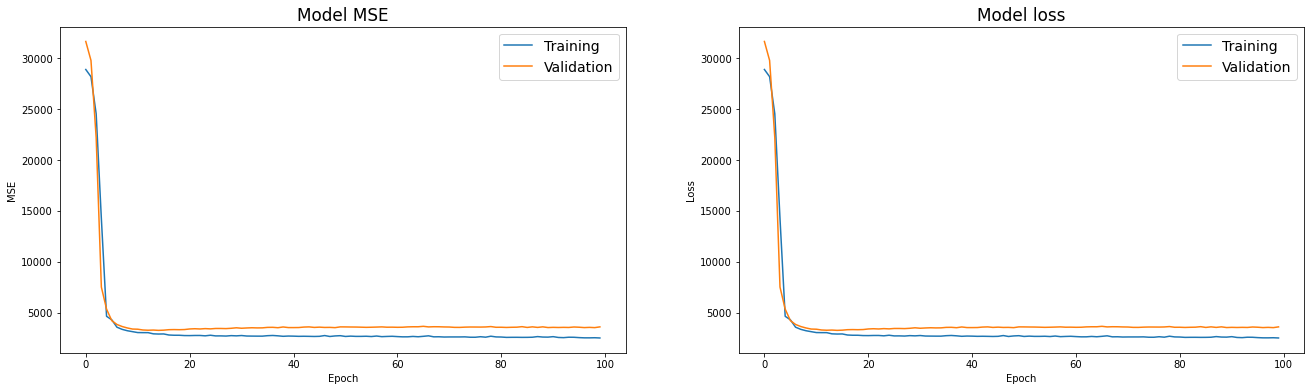

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [39]:
# insert code here
# Calculate R2 and adjusted R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

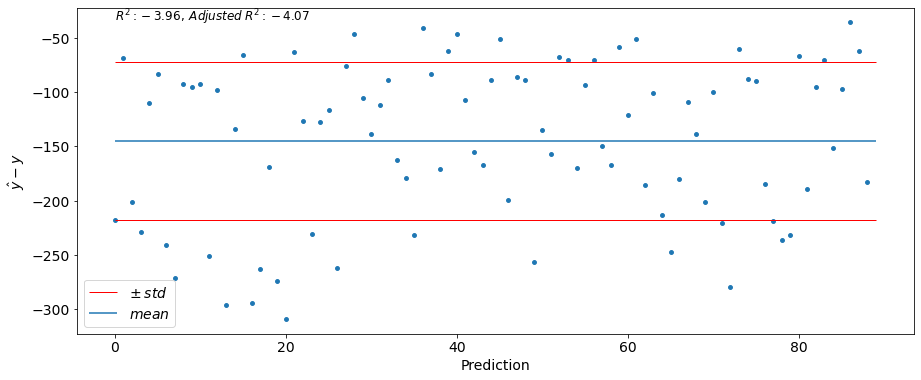

In [40]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



